<h1 style="font-size:10vw"> <center>Heart Disease Detection</center></h1>


---



<img src="https://grsmedical.ca/wp-content/uploads/2021/07/banner-cardiac.png" width="100%">

This notebook is a continuation of our [previous notebook](https://colab.research.google.com/drive/1dPGxW3xwISgqj1ZaCNryc6RmOIqywsih?usp=sharing), in which we explored the [Personal Key Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) dataset in order to gain insights about heart disease and its causses. In the this notebook we carry on with building a machine learning model to identify heart dissease patients

<h2 style="font-size:10vw"> Table of contents</h2>


>[1 Data Reading](#scrollTo=YHqDw4MHE1O_)

>[2 Data Cleaning](#scrollTo=0hp4oy75D0-_)

>>[2.1 Missing Data](#scrollTo=HrMNI7qAEp2I)

>>>[2.1.1 Null Values](#scrollTo=_Mxxpm3FG3hn)

>>>[2.1.2 Unusual Values](#scrollTo=GvZZxDp1Hsz5)

>>[2.2 Outliers](#scrollTo=MirTteWmRSkB)

>>>[2.2.1 Univariate Outlier Detection](#scrollTo=5HLSgD_X1jMz)

>>>[2.2.2 Multivariate Outlier Detection](#scrollTo=RGrOlcXC5MbX)

>>>[2.2.3 Outlier Removal](#scrollTo=myTNpGYZNNNS)

>>[2.3 Categorical Encoding & Feature Scaling](#scrollTo=nC9bWu3yTdjG)

>>[2.4 Train-Test Split](#scrollTo=W7UG7RjtaCiv)

>[3 Modeling](#scrollTo=N6EWiDSS_YPp)

>>[Helpers](#scrollTo=hQX4za92E8XV)

>>[3.1 Logistic Regression](#scrollTo=E9YzxzLJ_q4V)

>>>[3.1.1 Model](#scrollTo=B1k-6nT2FZhi)

>>>[3.1.2 Evaluation](#scrollTo=BIJ8ePgcEmyT)

>>>>[3.1.2.1 Classification Report](#scrollTo=Ytx4bHtqFSBR)

>>>>[3.1.2.2 Confusion Matrix](#scrollTo=bSSkKZpVFgZi)

>>[3.2 Decision Tree](#scrollTo=0y8o_3VvIKLG)

>>>[3.2.1 Model](#scrollTo=vrP2Hv8gI4T7)

>>>[3.2.2 Evaluation](#scrollTo=-VEeeeWOI_jS)

>>>>[3.2.2.1 Classification Report](#scrollTo=KesA7S2dI_jS)

>>>>[3.2.2.2 Confusion Matrix](#scrollTo=rgyBOHadI_jT)

>>>[3.2.3 Feature Importances](#scrollTo=GYcVhUT7PdWi)

>>[3.3 Random Forest](#scrollTo=S5yEdz9LPpHS)

>>>[3.3.1 Model](#scrollTo=FuqXk9BEQOTW)

>>>[3.3.2 Evaluation](#scrollTo=3F5jXZk1QOTf)

>>>>[3.3.2.1 Classification Report](#scrollTo=kD2dp7H3QOTf)

>>>>[3.3.2.2 Confusion Matrix](#scrollTo=i3SxrrwyQOTf)

>>>[3.3.3 Feature Importances](#scrollTo=nqsJ77noQQAO)

>>[3.4 KNN](#scrollTo=h6zgbnOMCHPF)

>>>[3.4.1 Hyperparameter Tuning](#scrollTo=Z-6y7FBDZ4RG)

>>>[3.4.2 Model](#scrollTo=g1cl9wpnGJB-)

>>>[3.4.3 Evaluation](#scrollTo=n8-X7--qcPoe)

>>>>[3.4.3.1 Classification Report](#scrollTo=JiomRWqkcduV)

>>>>[3.4.3.2 Confusion Matrix](#scrollTo=tDG5YVf1cwGa)

>>[3.5 SVM](#scrollTo=iglzj4tdKNam)

>>>[3.5.1 Hyperparameter Tuning](#scrollTo=IlpbTWzgkzhV)

>>>[3.5.2 Model](#scrollTo=LIP-6ZBskzhd)

>>>[3.5.3 Evaluation](#scrollTo=_LGhgI25kzhe)

>>>>[3.5.3.1 Classification Report](#scrollTo=aALP7FN8kzhe)

>>>>[3.5.3.2 Confusion Matrix](#scrollTo=Hr5aU7pskzhe)

>>>>[3.5.3.3 ROC Curve](#scrollTo=df3_RtiQwJCU)

>>[3.6 AdaBoost](#scrollTo=4CX63cd2wrBJ)

>>>[3.6.1 Model](#scrollTo=d4M-7xK40dm8)

>>>[3.6.2 Evaluation](#scrollTo=euGNQoeB0ZkF)

>>>>[3.6.2.1 Classification Report](#scrollTo=8lHaga540j-M)

>>>>[3.6.2.2 Confusion Matrix](#scrollTo=2tR4N3MH0OMf)

>>[3.7 XGBoost](#scrollTo=W-92_Imc1HFC)

>>>[3.7.1 Model](#scrollTo=xsx8wS-B0wIX)

>>>[3.7.2 Evaluation](#scrollTo=1mxWyNaL0wIY)

>>>>[3.7.2.1 Classification Report](#scrollTo=kL8mjgWg0wIY)

>>>>[3.7.2.2 Confusion Matrix](#scrollTo=kwXzg_Zm0wIY)

>>[3.8 CatBoost](#scrollTo=TV914rH21NOs)

>>>[3.8.1 Model](#scrollTo=Kg0XspZz06Cn)

>>>[3.8.2 Evaluation](#scrollTo=qHNjJwob06Cv)

>>>>[3.8.2.1 Classification Report](#scrollTo=BvOiJUm_06Cv)

>>>>[3.8.2.2 Confusion Matrix](#scrollTo=niOK_Ha-06Cv)

>>[3.9 Voting](#scrollTo=k5WVhRul1dC1)

>>>[3.5.1 Model](#scrollTo=2dmEXxQ51dC1)

>>>[3.5.2 Evaluation](#scrollTo=4NXU81v51dC2)

>>>>[3.5.2.1 Classification Report](#scrollTo=qTlxt7Uz1dC2)

>>>>[3.5.2.2 Confusion Matrix](#scrollTo=2weVgEsi1dC2)

>>[3.10 Model Comparison](#scrollTo=qGQuNGG9kvmP)

>>>[3.10.1 Highlights](#scrollTo=KnQH1sb2Uxf4)

>[4 Conclusion](#scrollTo=9H0rKZ_52Usj)



In [ ]:
!pip install pywaffle
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shutil
from os import path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pywaffle.waffle import Waffle

import scipy
from scipy.stats import zscore
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import f_classif, chi2
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.tree  import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


%matplotlib inline
sns.set_style("darkgrid")

colors6 = sns.color_palette(['#1337f5', '#E80000', '#0f1e41', '#fd523e', '#404e5c', '#c9bbaa'], 6)
colors2 = sns.color_palette(['#1337f5', '#E80000'], 2)
colors1 = sns.color_palette(['#1337f5'], 1)

# 1 Data Reading <a class="anchor" id="data_read"></a>

In [ ]:
if path.exists('./heart-disease'):
    shutil.rmtree('./heart-disease')

!git clone https://github.com/lemonpudding-datasets/heart-disease.git

shutil.move("./heart-disease/heart_2020_cleaned.csv", "./heart_2020_cleaned.csv")
shutil.rmtree('./heart-disease')

Cloning into 'heart-disease'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
df = pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# 2 Data Cleaning

In [ ]:
num_cols = df.select_dtypes(exclude='object').columns
obj_cols = df.select_dtypes(include='object').columns[1:]

## 2.1 Missing Data

For missing data we should first check if any values are null/NaN. Then we should check the unique values of every column (especially categorical) in search of any abnormal values such as "???".

### 2.1.1 Null Values

In [ ]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

We Have no null values in the dataset.

### 2.1.2 Unusual Values

In [ ]:
print(f"Unique Values for categorical columns:")
for col in df.select_dtypes(include='object'):
  print(f"  - {col}: {df[col].unique()}\n")

Unique Values for categorical columns:
  - HeartDisease: ['No' 'Yes']

  - Smoking: ['Yes' 'No']

  - AlcoholDrinking: ['No' 'Yes']

  - Stroke: ['No' 'Yes']

  - DiffWalking: ['No' 'Yes']

  - Sex: ['Female' 'Male']

  - AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']

  - Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

  - Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']

  - PhysicalActivity: ['Yes' 'No']

  - GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']

  - Asthma: ['Yes' 'No']

  - KidneyDisease: ['No' 'Yes']

  - SkinCancer: ['Yes' 'No']



We can see for each column that all the values are valid and there are no missing values.

## 2.2 Outliers

### 2.2.1 Univariate Outlier Detection

We should explore outliers only in the numerical variables as there is no notion of uniariate outliers in categorical variables.

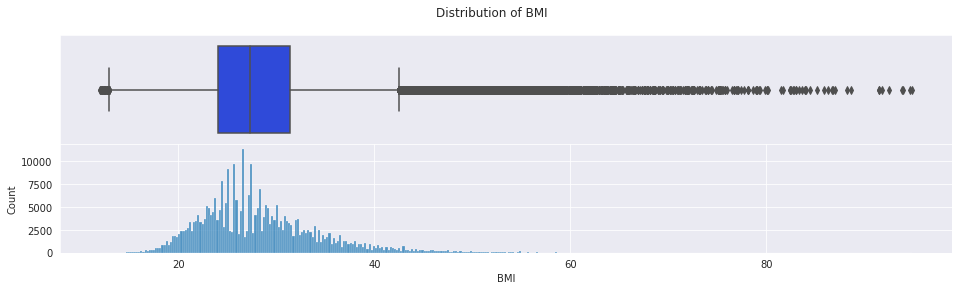

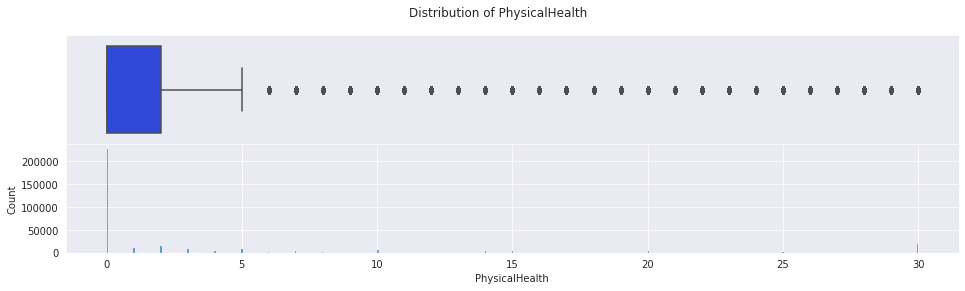

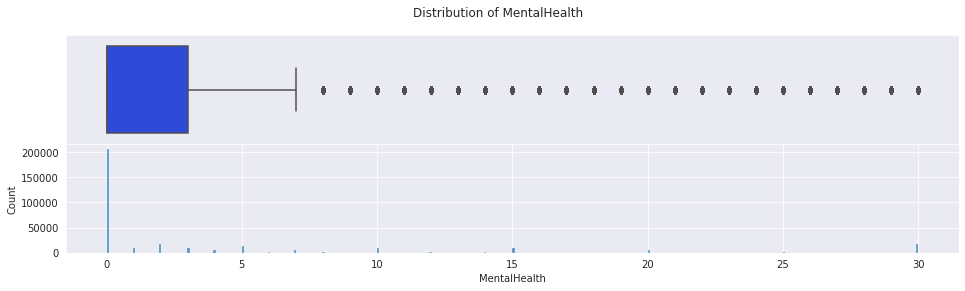

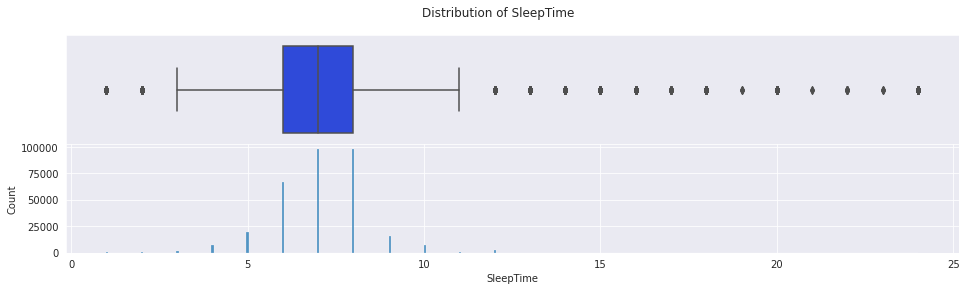

In [ ]:
numerical = df.select_dtypes(exclude='object')
n = len(numerical)

for col in numerical:
  fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
  plt.suptitle(f"Distribution of {col}")
  sns.boxplot(data=df, x=col, ax=ax1, palette=colors1)
  ax1.set_xlabel(None)
  ax1.get_xaxis().set_ticks([])
  sns.histplot(data=df, x=col, ax=ax2, palette=colors1)
  plt.subplots_adjust(hspace=0)
  print("\n")
  plt.show()



We can see that all numerical variables are skewed and contain outliers. Let's examine the IQR outliers more closely.

In [ ]:
for col in numerical:
  Q1, Q3 = df[col].quantile([0.25,0.75])
  IQR = Q3 - Q1
  right = Q3 + 1.5 * IQR
  left = Q1 - 1.5 * IQR
  n = len(df.loc[(df[col] < left) | (df[col] > right)])
  print(f"{col}:\n\tOutlier Num = {n}\n\tOutlier Percentage = {n*100/len(df):.2f}%\n")

BMI:
	Outlier Num = 10396
	Outlier Percentage = 3.25%

PhysicalHealth:
	Outlier Num = 47146
	Outlier Percentage = 14.74%

MentalHealth:
	Outlier Num = 51576
	Outlier Percentage = 16.13%

SleepTime:
	Outlier Num = 4543
	Outlier Percentage = 1.42%



### 2.2.2 Multivariate Outlier Detection

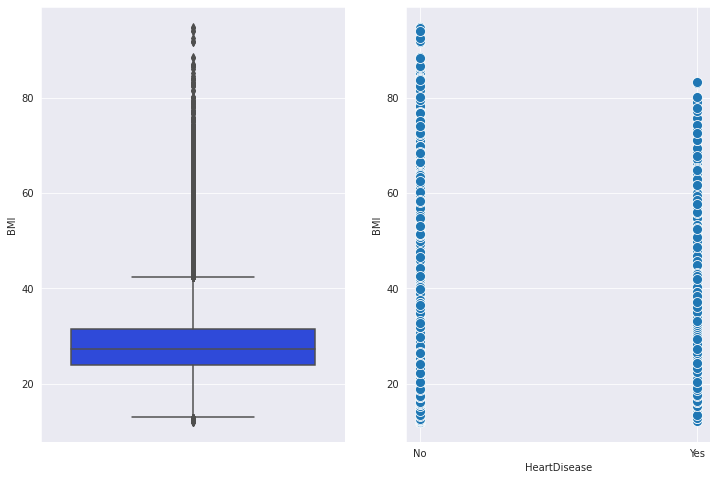

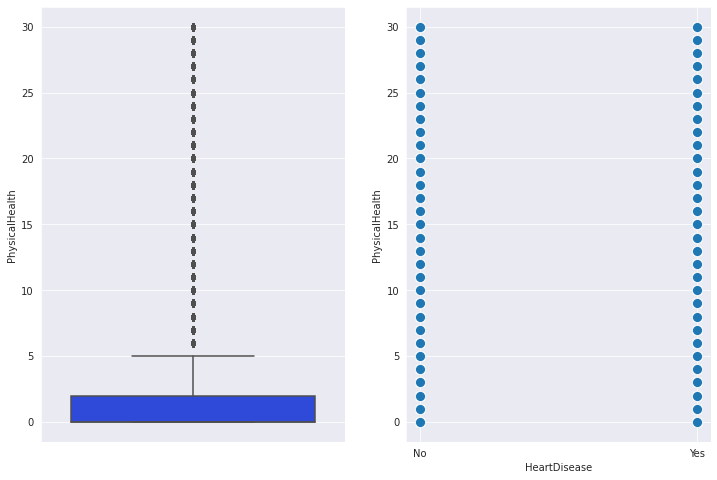

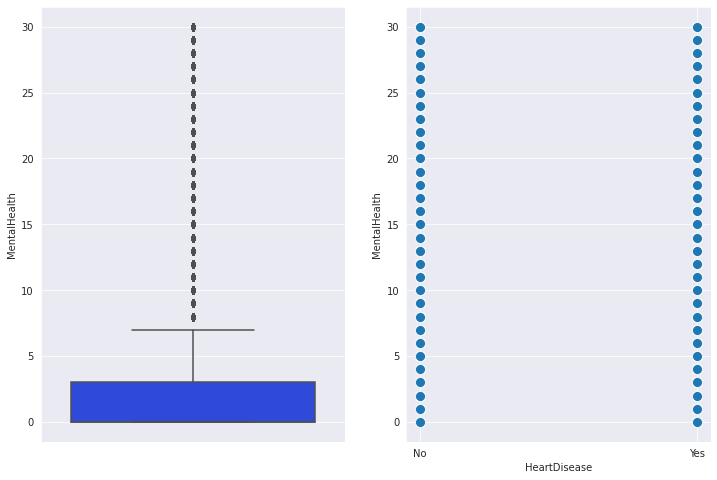

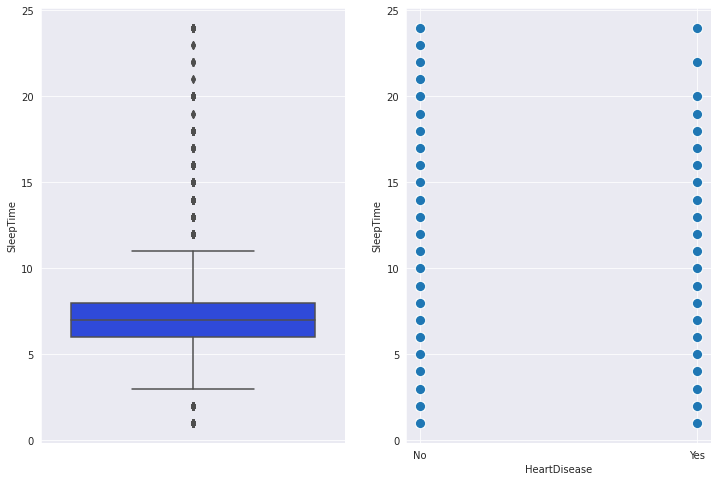

In [ ]:
num_cols = df.select_dtypes(exclude='object').columns
for col in num_cols:
    fig, ax =plt.subplots(1,2, figsize=(12,8))
    sns.boxplot(data=df, y=col, ax=ax[0], palette=colors1)
    sns.scatterplot(data=df,x = 'HeartDisease', s = 100, y=col, ax=ax[1], palette=colors1)
    plt.show()

### 2.2.3 Outlier Removal

In [ ]:
zs = df.copy()
for col in num_cols:
  zs[col] = zscore(zs[col])
outscores = np.abs(zs[num_cols])
no_outliers = (outscores<=3.3).all(axis=1)
df2 = df[no_outliers]

## 2.3 Categorical Encoding & Feature Scaling

In [ ]:
trans = make_column_transformer(
    (OrdinalEncoder(), obj_cols),
    (StandardScaler(), num_cols),
    remainder='passthrough'
)

trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')),
                                ('standardscaler', StandardScaler(),
                                 Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object'))])

## 2.4 Train-Test Split

In [ ]:
X = df2.drop(columns=['HeartDisease'])
y =  df2['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

The test set contains 73,600 observations.

# 3 Modeling

## Helpers

In [ ]:
#@title
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
# Let's make function to make using different algorithms easy.
def try_model(transformation, sampler, model, X_train, y_train, X_test, y_test):
    model_pipeline = Pipeline(steps=[('transform', transformation),
                                     ('sample', sampler),
                                     ('model', model)])

    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)

    print(f'Training Accuracy : {model_pipeline.score(X_train, y_train)}')
    print(f'Test Accuracy : {model_pipeline.score(X_test, y_test)}')

    return y_pred, classification_report(y_test, y_pred)

In [ ]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.figure(figsize=(16, 8), dpi=80)
    sns.barplot(x=list(imp[::-1][0:top]), y=list(names[::-1][0:top]), palette='RdYlGn')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title("Feature Importance");
    plt.show()

In [ ]:
def plot_roc_auc(model, X_test, y_test, y_pred=None):
  if(y_pred is None):
    y_pred =  model.decision_function(X_test)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)

  roc_auc = auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.axis('tight')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  return fpr, tpr, thresholds

In [ ]:
model_metrics = {
           'Model':[],
           'Sampling Method':[],
           'Heart Disease Precision':[], 
           'No Heart Disease Precision':[],
           'Heart Disease Recall':[],
           'No Heart Disease Recall':[],
           'Heart Disease F1':[],
           'No Heart Disease F1':[],
           'Accuracy':[]}

## 3.1 Logistic Regression

### 3.1.1 Model

In [ ]:
y_pred, report = try_model(trans,
                           SMOTE(random_state = 42),
                           LogisticRegression(C = 1000),
                           X_train,
                           y_train,
                           X_test,
                           y_test)

Training Accuracy : 0.7240954524662478
Test Accuracy : 0.7260906781157864


### 3.1.2 Evaluation

#### 3.1.2.1 Classification Report

In [ ]:
print(report)

              precision    recall  f1-score   support

          No       0.98      0.72      0.83     68052
         Yes       0.19      0.78      0.30      5549

    accuracy                           0.73     73601
   macro avg       0.58      0.75      0.56     73601
weighted avg       0.92      0.73      0.79     73601



In [ ]:
model_metrics['Model'].append("Logistic Regression")
model_metrics['Sampling Method'].append("SMOTE")
model_metrics['Heart Disease Precision'].append(0.19)
model_metrics['No Heart Disease Precision'].append(0.98)
model_metrics['Heart Disease Recall'].append(0.78)
model_metrics['No Heart Disease Recall'].append(0.72)
model_metrics['Heart Disease F1'].append(0.30)
model_metrics['No Heart Disease F1'].append(0.83)
model_metrics['Accuracy'].append(0.73)

#### 3.1.2.2 Confusion Matrix

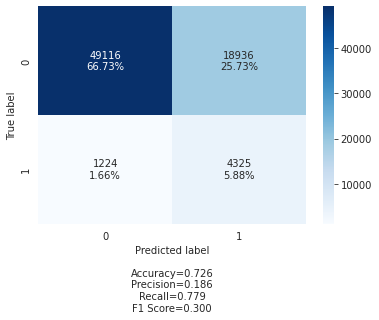

In [ ]:
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm)

## 3.2 Decision Tree

### 3.2.1 Model

In [ ]:
dt = DecisionTreeClassifier(max_features=17, max_depth=10)

y_pred, report = try_model(trans,
                           SMOTE(random_state = 42),
                           dt,
                           X_train,
                           y_train,
                           X_test,
                           y_test)

Training Accuracy : 0.8049329486732397
Test Accuracy : 0.8016467167565658


### 3.2.2 Evaluation

#### 3.2.2.1 Classification Report

In [ ]:
print(report)

              precision    recall  f1-score   support

          No       0.96      0.82      0.88     68052
         Yes       0.22      0.63      0.32      5549

    accuracy                           0.80     73601
   macro avg       0.59      0.72      0.60     73601
weighted avg       0.91      0.80      0.84     73601



In [ ]:
model_metrics['Model'].append("Decision Tree")
model_metrics['Sampling Method'].append("SMOTE")
model_metrics['Heart Disease Precision'].append(0.22)
model_metrics['No Heart Disease Precision'].append(0.96)
model_metrics['Heart Disease Recall'].append(0.63)
model_metrics['No Heart Disease Recall'].append(0.82)
model_metrics['Heart Disease F1'].append(0.32)
model_metrics['No Heart Disease F1'].append(0.88)
model_metrics['Accuracy'].append(0.80)

#### 3.2.2.2 Confusion Matrix

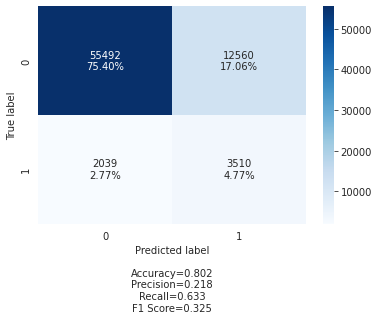

In [ ]:
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm)

### 3.2.3 Feature Importances

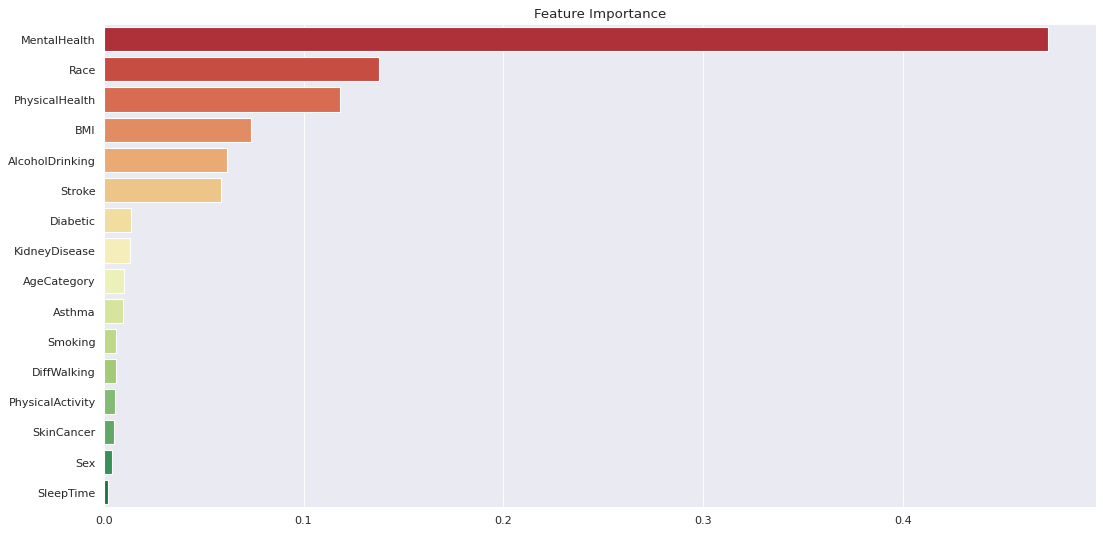

In [ ]:
features_names = df2.columns.drop('HeartDisease').to_list()
f_importances(abs(dt.feature_importances_), features_names, top=16)

## 3.3 Random Forest

### 3.3.1 Model

In [ ]:
rf = RandomForestClassifier(max_features=17, max_depth=10)

y_pred, report = try_model(trans,
                           SMOTE(random_state = 42),
                           rf,
                           X_train,
                           y_train,
                           X_test,
                           y_test)

Training Accuracy : 0.8110515803823353
Test Accuracy : 0.8083042349968071


### 3.3.2 Evaluation

#### 3.3.2.1 Classification Report

In [ ]:
print(report)

              precision    recall  f1-score   support

          No       0.96      0.82      0.89     68052
         Yes       0.22      0.63      0.33      5549

    accuracy                           0.81     73601
   macro avg       0.59      0.72      0.61     73601
weighted avg       0.91      0.81      0.85     73601



In [ ]:
model_metrics['Model'].append("Random Forest")
model_metrics['Sampling Method'].append("SMOTE")
model_metrics['Heart Disease Precision'].append(0.22)
model_metrics['No Heart Disease Precision'].append(0.96)
model_metrics['Heart Disease Recall'].append(0.63)
model_metrics['No Heart Disease Recall'].append(0.82)
model_metrics['Heart Disease F1'].append(0.33)
model_metrics['No Heart Disease F1'].append(0.89)
model_metrics['Accuracy'].append(0.81)

#### 3.3.2.2 Confusion Matrix

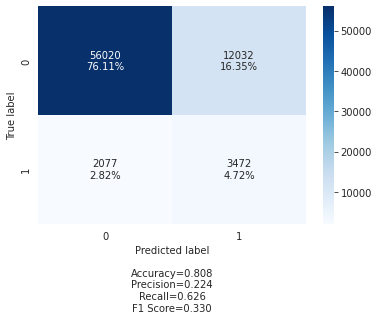

In [ ]:
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm)

### 3.3.3 Feature Importances

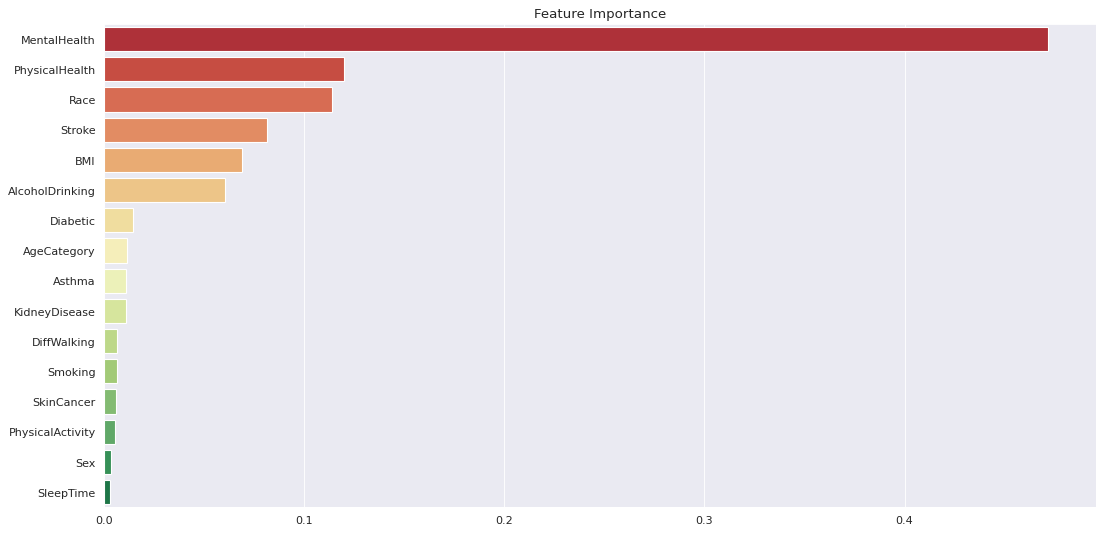

In [ ]:
f_importances(abs(rf.feature_importances_), features_names, top=16)

## 3.4 KNN

### 3.4.1 Hyperparameter Tuning

In [ ]:
err = []
k = list(range(1, 21))

for i in k:

  neigh_undersample = Pipeline(steps=[('transform', trans),
                                      ('sample', RandomUnderSampler(random_state = 42)),
                                      ('KNN', KNeighborsClassifier(n_neighbors=i))])

  res = cross_val_score(neigh_undersample, X_train.iloc[:20000], y_train.iloc[:20000], scoring='f1_micro', cv=5)

  err.append(1 - res.mean())

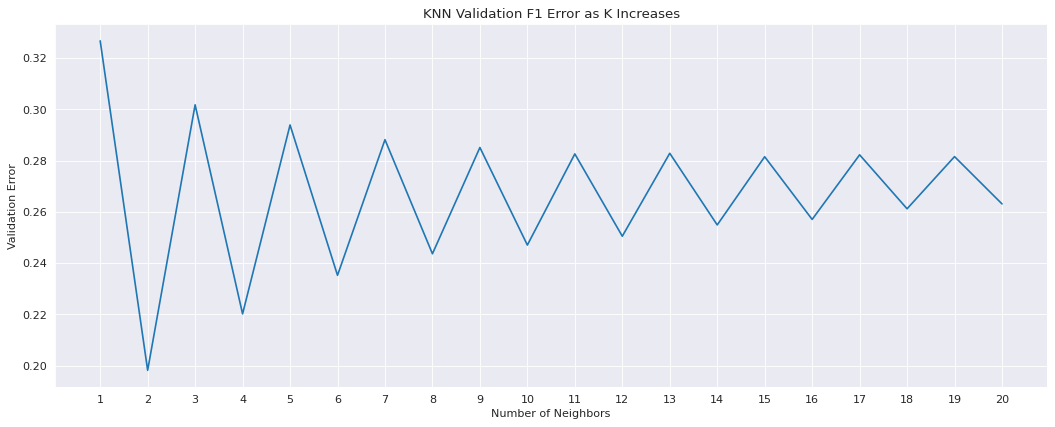

In [ ]:
plt.figure(figsize=(16, 6), dpi=80)
fig = sns.lineplot(x=k, y=err, palette=colors1);
fig.set_title("KNN Validation F1 Error as K Increases")
fig.set_xlabel("Number of Neighbors")
fig.set_ylabel("Validation Error")
fig.set_xticks(k);

The error fluctuates and it does look like it is less with even K. However to avoid ties we will set the number of neighbors to 19.  

### 3.4.2 Model

In [ ]:
y_pred, report = try_model(trans,
                           RandomUnderSampler(random_state = 42),
                           KNeighborsClassifier(n_neighbors=19),
                           X_train,
                           y_train,
                           X_test,
                           y_test)

Training Accuracy : 0.734339971286362
Test Accuracy : 0.7326123286368392


### 3.4.3 Evaluation

#### 3.4.3.1 Classification Report

In [ ]:
print(report)

              precision    recall  f1-score   support

          No       0.97      0.73      0.83     68052
         Yes       0.19      0.76      0.30      5549

    accuracy                           0.73     73601
   macro avg       0.58      0.74      0.57     73601
weighted avg       0.91      0.73      0.79     73601



In [ ]:
model_metrics['Model'].append("KNN")
model_metrics['Sampling Method'].append("Random Undersampling")
model_metrics['Heart Disease Precision'].append(0.19)
model_metrics['No Heart Disease Precision'].append(0.97)
model_metrics['Heart Disease Recall'].append(0.76)
model_metrics['No Heart Disease Recall'].append(0.73)
model_metrics['Heart Disease F1'].append(0.30)
model_metrics['No Heart Disease F1'].append(0.83)
model_metrics['Accuracy'].append(0.73)

#### 3.4.3.2 Confusion Matrix

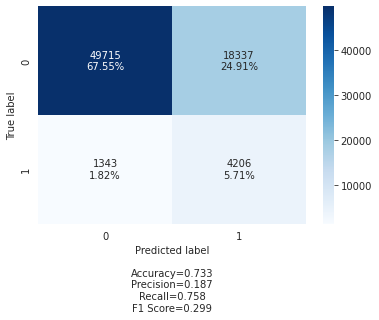

In [ ]:
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm)

The false positive rate is really high. However in our application (Heart disease prediction), it is much more desirable than false negatives.

## 3.5 SVM

### 3.5.1 Hyperparameter Tuning

In [ ]:
svm_undersample = Pipeline(steps=[('transform', trans),
                                     ('sample', RandomUnderSampler(random_state = 42)),
                                     ('SVM', SVC())])

svm_dist1 = {
    "SVM__C": scipy.stats.expon(scale=.1),
    "SVM__gamma": scipy.stats.expon(scale=.01),
    "SVM__kernel": ["rbf"],
}

svm_dist2 = {
    "SVM__C": scipy.stats.expon(scale=1),
    "SVM__gamma": scipy.stats.expon(scale=.01),
    "SVM__kernel": ["rbf"],
}

svm_dist3 = {
    "SVM__C": scipy.stats.expon(scale=10),
    "SVM__gamma": scipy.stats.expon(scale=.01),
    "SVM__kernel": ["rbf"],
}

svm_dist4 = {
    "SVM__C": scipy.stats.expon(scale=100),
    "SVM__gamma": scipy.stats.expon(scale=.01),
    "SVM__kernel": ["rbf"],
}

svm_dist5 = {
    "SVM__C": scipy.stats.expon(scale=1000),
    "SVM__gamma": scipy.stats.expon(scale=.01),
    "SVM__kernel": ["rbf"],
}

svm_dist6 = {
    "SVM__C": scipy.stats.expon(scale=.1),
    "SVM__gamma": scipy.stats.expon(scale=1),
    "SVM__kernel": ["rbf"],
}

svm_dist7 = {
    "SVM__C": scipy.stats.expon(scale=1),
    "SVM__gamma": scipy.stats.expon(scale=1),
    "SVM__kernel": ["rbf"],
}

svm_dist8 = {
    "SVM__C": scipy.stats.expon(scale=10),
    "SVM__gamma": scipy.stats.expon(scale=1),
    "SVM__kernel": ["rbf"],
}

svm_dist9 = {
    "SVM__C": scipy.stats.expon(scale=100),
    "SVM__gamma": scipy.stats.expon(scale=1),
    "SVM__kernel": ["rbf"],
}

svm_dist10 = {
    "SVM__C": scipy.stats.expon(scale=1000),
    "SVM__gamma": scipy.stats.expon(scale=1),
    "SVM__kernel": ["rbf"],
}

svm_dist11 = {
    "SVM__C": scipy.stats.expon(scale=.1),
    "SVM__gamma": scipy.stats.expon(scale=10),
    "SVM__kernel": ["rbf"],
}

svm_dist12 = {
    "SVM__C": scipy.stats.expon(scale=1),
    "SVM__gamma": scipy.stats.expon(scale=10),
    "SVM__kernel": ["rbf"],
}

svm_dist13 = {
    "SVM__C": scipy.stats.expon(scale=10),
    "SVM__gamma": scipy.stats.expon(scale=10),
    "SVM__kernel": ["rbf"],
}

svm_dist14 = {
    "SVM__C": scipy.stats.expon(scale=100),
    "SVM__gamma": scipy.stats.expon(scale=10),
    "SVM__kernel": ["rbf"],
}

svm_dist15 = {
    "SVM__C": scipy.stats.expon(scale=1000),
    "SVM__gamma": scipy.stats.expon(scale=10),
    "SVM__kernel": ["rbf"],
}

svm_dist16 = {
    "SVM__C": scipy.stats.expon(scale=10),
    "SVM__degree": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "SVM__kernel": ["poly"],
}

distributions = [svm_dist1, svm_dist2, svm_dist3, svm_dist4, svm_dist5,
                svm_dist6, svm_dist7, svm_dist8, svm_dist9, svm_dist10,
                svm_dist11, svm_dist12, svm_dist13, svm_dist14, svm_dist15,
                svm_dist16]

clf = RandomizedSearchCV(svm_undersample, distributions, random_state=42, scoring='f1_micro', cv=5)

clf.fit(X_train[:10000], y_train[:10000])

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transform',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(),
                                                                               Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')),
                                                                              ('standardsca...
                                        {'SVM__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2833c7ea50>,
                                         'SVM__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2833c

In [ ]:
clf.best_params_

{'SVM__C': 0.051059393679958126,
 'SVM__gamma': 0.4778961126377176,
 'SVM__kernel': 'rbf'}

### 3.5.2 Model

In [ ]:
svm = SVC(C=0.05, gamma=0.477)

y_pred, report = try_model(trans,
                           RandomUnderSampler(random_state = 42),
                           svm,
                           X_train,
                           y_train,
                           X_test,
                           y_test)

Training Accuracy : 0.586971979293572
Test Accuracy : 0.5874512574557411


### 3.5.3 Evaluation

#### 3.5.3.1 Classification Report

In [ ]:
print(report)

              precision    recall  f1-score   support

          No       0.98      0.56      0.72     68052
         Yes       0.14      0.87      0.24      5549

    accuracy                           0.59     73601
   macro avg       0.56      0.72      0.48     73601
weighted avg       0.92      0.59      0.68     73601



In [ ]:
model_metrics['Model'].append("SVM")
model_metrics['Sampling Method'].append("Random Undersampling")
model_metrics['Heart Disease Precision'].append(0.14)
model_metrics['No Heart Disease Precision'].append(0.98)
model_metrics['Heart Disease Recall'].append(0.87)
model_metrics['No Heart Disease Recall'].append(0.56)
model_metrics['Heart Disease F1'].append(0.24)
model_metrics['No Heart Disease F1'].append(0.72)
model_metrics['Accuracy'].append(0.59)

#### 3.5.3.2 Confusion Matrix

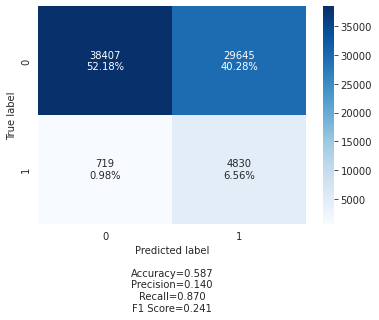

In [ ]:
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm)

#### 3.5.3.3 ROC Curve

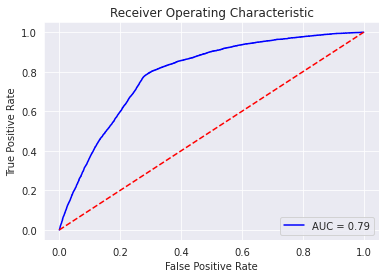

In [ ]:
svm_pipeline = Pipeline(steps=[('transform', trans),
                               ('sample', RandomUnderSampler(random_state = 42)),
                               ('model', svm)])

fpr, tpr, thresholds = plot_roc_auc(svm_pipeline, X_test, y_test.map({'No':0, 
                                                                      'Yes':1}))

In [ ]:
top_left = np.sqrt((1 - tpr)**2 + tpr**2)
threshold_df = pd.DataFrame({"Threshold":thresholds, "TPR":tpr, "FPR":fpr, "Distance":top_left})
threshold_df = threshold_df.sort_values("Distance")
threshold_df

,Threshold,TPR,FPR,Distance
4559,0.666470,0.49991,0.154308,0.707107
4558,0.667108,0.49991,0.154073,0.707107
4560,0.666463,0.50009,0.154308,0.707107
4561,0.666432,0.50009,0.154338,0.707107
4562,0.666372,0.50027,0.154338,0.707107
...,...,...,...,...
0,2.245288,0.00000,0.000000,1.000000
2,1.203195,0.00000,0.000103,1.000000
1,1.245288,0.00000,0.000015,1.000000
11740,-1.578765,1.00000,0.999897,1.000000


The optimal threshold for classification seems to be around 0.66. Meaning, any sample decision function that is greater than or equal 0.66 is classified as 1 (heart disease), and otherwise 0 (normal).

## 3.6 AdaBoost

### 3.6.1 Model

In [ ]:
y_pred, report = try_model(trans,
                           RandomUnderSampler(random_state = 42),
                           AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                           X_train,
                           y_train,
                           X_test,
                           y_test)

Training Accuracy : 0.7571795417593218
Test Accuracy : 0.712571840056521


### 3.6.2 Evaluation

#### 3.6.2.1 Classification Report

In [ ]:
print(report)

              precision    recall  f1-score   support

          No       0.97      0.71      0.82     68052
         Yes       0.16      0.68      0.26      5549

    accuracy                           0.71     73601
   macro avg       0.56      0.70      0.54     73601
weighted avg       0.90      0.71      0.78     73601



In [ ]:
model_metrics['Model'].append("AdaBoost")
model_metrics['Sampling Method'].append("Random Undersampling")
model_metrics['Heart Disease Precision'].append(0.17)
model_metrics['No Heart Disease Precision'].append(0.97)
model_metrics['Heart Disease Recall'].append(0.73)
model_metrics['No Heart Disease Recall'].append(0.70)
model_metrics['Heart Disease F1'].append(0.81)
model_metrics['No Heart Disease F1'].append(0.27)
model_metrics['Accuracy'].append(0.70)

#### 3.6.2.2 Confusion Matrix

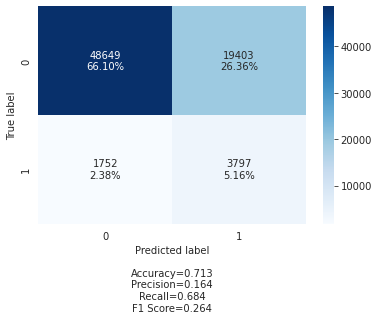

In [ ]:
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm)

## 3.7 XGBoost

### 3.7.1 Model

In [ ]:
y_pred, report = try_model(trans,
                           RandomUnderSampler(random_state = 42),
                           XGBClassifier(),
                           X_train,
                           y_train,
                           X_test,
                           y_test)

Training Accuracy : 0.7348019257159162
Test Accuracy : 0.7342291544951834


### 3.7.2 Evaluation

#### 3.7.2.1 Classification Report

In [ ]:
print(report)

              precision    recall  f1-score   support

          No       0.98      0.73      0.84     68052
         Yes       0.19      0.80      0.31      5549

    accuracy                           0.73     73601
   macro avg       0.59      0.76      0.57     73601
weighted avg       0.92      0.73      0.80     73601



In [ ]:
model_metrics['Model'].append("XGBoost")
model_metrics['Sampling Method'].append("Random Undersampling")
model_metrics['Heart Disease Precision'].append(0.19)
model_metrics['No Heart Disease Precision'].append(0.98)
model_metrics['Heart Disease Recall'].append(0.80)
model_metrics['No Heart Disease Recall'].append(0.73)
model_metrics['Heart Disease F1'].append(0.31)
model_metrics['No Heart Disease F1'].append(0.84)
model_metrics['Accuracy'].append(0.73)

#### 3.7.2.2 Confusion Matrix

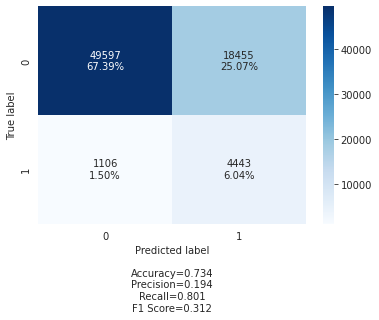

In [ ]:
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm)

## 3.8 CatBoost

### 3.8.1 Model

In [ ]:
y_pred, report = try_model(trans,
                           SMOTE(random_state = 42),
                           CatBoostClassifier(),
                           X_train,
                           y_train,
                           X_test,
                           y_test)

Learning rate set to 0.134264
0:	learn: 0.6211977	total: 134ms	remaining: 2m 13s
1:	learn: 0.5815377	total: 236ms	remaining: 1m 57s
2:	learn: 0.5377967	total: 338ms	remaining: 1m 52s
3:	learn: 0.5099531	total: 443ms	remaining: 1m 50s
4:	learn: 0.4860950	total: 551ms	remaining: 1m 49s
5:	learn: 0.4717401	total: 665ms	remaining: 1m 50s
6:	learn: 0.4492315	total: 773ms	remaining: 1m 49s
7:	learn: 0.4404596	total: 883ms	remaining: 1m 49s
8:	learn: 0.4296124	total: 996ms	remaining: 1m 49s
9:	learn: 0.4220085	total: 1.1s	remaining: 1m 49s
10:	learn: 0.4064600	total: 1.21s	remaining: 1m 48s
11:	learn: 0.3998478	total: 1.32s	remaining: 1m 48s
12:	learn: 0.3796837	total: 1.42s	remaining: 1m 47s
13:	learn: 0.3649183	total: 1.53s	remaining: 1m 47s
14:	learn: 0.3605114	total: 1.65s	remaining: 1m 48s
15:	learn: 0.3531263	total: 1.76s	remaining: 1m 48s
16:	learn: 0.3494957	total: 1.87s	remaining: 1m 48s
17:	learn: 0.3436542	total: 1.97s	remaining: 1m 47s
18:	learn: 0.3276607	total: 2.08s	remaining: 

### 3.8.2 Evaluation

#### 3.8.2.1 Classification Report

In [ ]:
print(report)

              precision    recall  f1-score   support

          No       0.94      0.96      0.95     68052
         Yes       0.28      0.21      0.24      5549

    accuracy                           0.90     73601
   macro avg       0.61      0.58      0.59     73601
weighted avg       0.89      0.90      0.89     73601



In [ ]:
model_metrics['Model'].append("CatBoost")
model_metrics['Sampling Method'].append("SMOTE")
model_metrics['Heart Disease Precision'].append(0.28)
model_metrics['No Heart Disease Precision'].append(0.94)
model_metrics['Heart Disease Recall'].append(0.21)
model_metrics['No Heart Disease Recall'].append(0.96)
model_metrics['Heart Disease F1'].append(0.24)
model_metrics['No Heart Disease F1'].append(0.95)
model_metrics['Accuracy'].append(0.90)

#### 3.8.2.2 Confusion Matrix

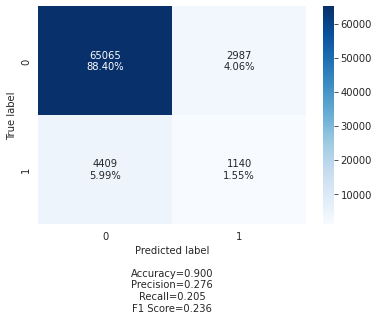

In [ ]:
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm)

## 3.9 Voting

### 3.5.1 Model

In [ ]:
voting = VotingClassifier(estimators=[('lr', LogisticRegression(C=1000)),
                                      ('dt', DecisionTreeClassifier(max_features=17,max_depth=10)),
                                      ('knn', KNeighborsClassifier(n_neighbors=19)),
                                      ('svm', SVC(C=0.05, gamma=0.477)), 
                                      ('xgb', XGBClassifier(learning_rate= 0.5, max_depth=1, random_state=42))],
                                      voting='hard')

y_pred, report = try_model(trans,
                           RandomUnderSampler(random_state = 42),
                           voting,
                           X_train,
                           y_train,
                           X_test,
                           y_test)

Training Accuracy : 0.7210836907441542
Test Accuracy : 0.7200173910680562


### 3.5.2 Evaluation

#### 3.5.2.1 Classification Report

In [ ]:
print(report)

              precision    recall  f1-score   support

          No       0.98      0.71      0.82     68052
         Yes       0.19      0.81      0.30      5549

    accuracy                           0.72     73601
   macro avg       0.58      0.76      0.56     73601
weighted avg       0.92      0.72      0.79     73601



In [ ]:
model_metrics['Model'].append("Voting Classifier")
model_metrics['Sampling Method'].append("Random Undersampling")
model_metrics['Heart Disease Precision'].append(0.19)
model_metrics['No Heart Disease Precision'].append(0.98)
model_metrics['Heart Disease Recall'].append(0.81)
model_metrics['No Heart Disease Recall'].append(0.71)
model_metrics['Heart Disease F1'].append(0.30)
model_metrics['No Heart Disease F1'].append(0.82)
model_metrics['Accuracy'].append(0.72)

#### 3.5.2.2 Confusion Matrix

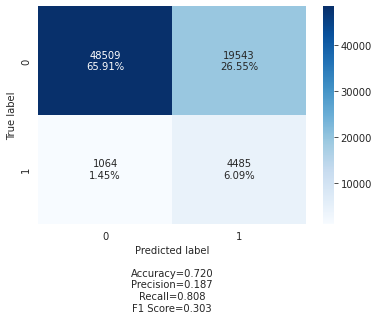

In [ ]:
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm)

## 3.10 Model Comparison

In our application, reducing false negatives is paramount. It could be the difference between life and death. On the other hand, false positives are not as important, as further tests to the patient would reveal the misdiagnosis. Therefore, we are looking for high recall for the heart diesease class. Below is a comparison of the models side by side using varoius metrics. 

In [ ]:
comparison = pd.DataFrame(model_metrics)
comparison = comparison.set_index('Model')
comparison

,Sampling Method,Heart Disease Precision,No Heart Disease Precision,Heart Disease Recall,No Heart Disease Recall,Heart Disease F1,No Heart Disease F1,Accuracy
Model,,,,,,,,
Logistic Regression,SMOTE,0.19,0.98,0.78,0.72,0.30,0.83,0.73
Decision Tree,SMOTE,0.22,0.96,0.63,0.82,0.32,0.88,0.80
Random Forest,SMOTE,0.22,0.96,0.63,0.82,0.33,0.89,0.81
KNN,Random Undersampling,0.19,0.97,0.76,0.73,0.30,0.83,0.73
SVM,Random Undersampling,0.14,0.98,0.87,0.56,0.24,0.72,0.59
AdaBoost,Random Undersampling,0.17,0.97,0.73,0.70,0.81,0.27,0.70
XGBoost,Random Undersampling,0.19,0.98,0.80,0.73,0.31,0.84,0.73
CatBoost,SMOTE,0.28,0.94,0.21,0.96,0.24,0.95,0.90
Voting Classifier,Random Undersampling,0.19,0.98,0.81,0.71,0.30,0.82,0.72


### 3.10.1 Highlights

*   The CatBoost model with SMOTE yielded the highest percision (28%) for the heart disease class (i.e. percentage of heart disease classifications that were actually correct). They also yielded the best over all accuracy. However, this is at the expense of heart disease recall being the lowest (21%) (i.e. only 21% of heart disease patients correctly identified).

*   The SVM model with random undersampling returned the highest recall (87%) for the heart diease class, however it has the lowest precision for heart diease (14%) (i.e. out of all heart disease classifications 14% were correct).

*   Random forest and decision tree models with SMOTE had a moderate recall for the heart disease class (63%) and a good recall for the no heart disease class (82%). However it still suffers from low precision in the heart disease class.


In our application we care the most about identifying heart diease in order to take proactive action in saving the patient. Therefore, using the SVM model to select patients for further tests would be the best course of action for medical experts.

# 4 Conclusion

In 2019, around 17.9 million people died from Cardiovascular diseases. **85%** of them were caused by heart diseases. In order to identify the causes of heart disease, we investigated the [Personal Key Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) which had 17 indicators of heart disease of 319,795 surveyed individuals in the U.S. During our investigation we identified that age is a major factor in heart disease. Furhtermore, heart diesease is more prominent in smokers (\~12%), kidney disease (\~30%), strole victims (\~48%), skin cancer patients (\~18%),people who have difficulty walking (\~18%), and diabetics (\~25%). Finally, after experimenting with different models we concluded that SVMs with random undersampling yield the best recall for the heart diseas class (87%), CatBoost with SMOTE yields the best recall for the no heart disease class (96%), and Decision tree/Random Forest had a compromise. An application of our model is to be used by medical experts in selecting the patients suspected of heart disease in order to conduct further testing on them.  